In [17]:
from keras.models import Sequential, load_model
from keras.layers import Activation, Conv2D, Conv2DTranspose
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [18]:
dataset = np.load("small_cat_images.npy")

In [19]:
def model(input_shape):
    model = Sequential()
    
    model.add(Conv2D(filters=128, kernel_size=3, strides=3, activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=3, strides=3, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=3, strides=3, activation='relu'))
    
    model.add(Conv2DTranspose(filters=32, kernel_size=3, strides=3, activation='relu'))
    model.add(Conv2DTranspose(filters=64, kernel_size=3, strides=3, activation='relu'))
    model.add(Conv2DTranspose(filters=3, kernel_size=3, strides=3, activation='relu'))
    
    model.compile(loss='mean_squared_error', optimizer=Adam(0.001))
    
    return model
    

In [20]:
model = model((162,162,3))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 54, 54, 128)       3584      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 64)        73792     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 32)          18464     
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 18, 18, 32)        9248      
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 54, 54, 64)        18496     
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 162, 162, 3)       1731      
Total params: 125,315
Trainable params: 125,315
Non-trainable params: 0
_________________________________________________________________


In [21]:
# checkpoint = ModelCheckpoint(filepath='autoEncoder.hdf5', verbose=1, save_best_only=True, mode='min')
# model.fit(dataset, dataset, epochs=1, callbacks=[checkpoint], validation_data=(dataset, dataset))

In [22]:
model = load_model("autoEncoder.hdf5")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


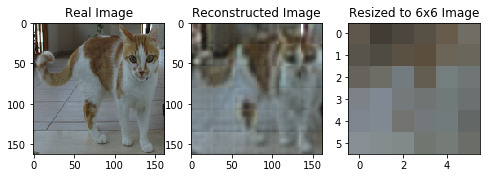

Difference = 0.3556299488991499


In [23]:
f = plt.figure(figsize=(8,8))

f.add_subplot(1,3, 1)
plt.imshow(dataset[10])
plt.title("Real Image")

f.add_subplot(1,3, 2)
plt.title("Reconstructed Image")
plt.imshow((model.predict(dataset[:11])[10]))

f.add_subplot(1,3, 3)
plt.title("Resized to 6x6 Image")
img = array_to_img(dataset[10])
new_img = img.resize((6,6), Image.ANTIALIAS)
new_img = img_to_array(new_img)
plt.imshow(new_img/255)

plt.show()

difference_1 = np.square(np.subtract(dataset[10],  model.predict(dataset[:20])[10])).mean() * 100
print("Difference = {}".format(difference_1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


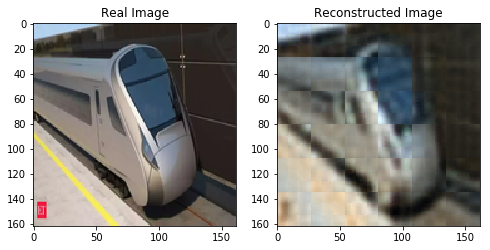

Difference = 0.4546365235000849


In [24]:
holiday_train = np.load("holiday_train.npy")
f = plt.figure(figsize=(8,8))

f.add_subplot(1,2,1)
plt.imshow(holiday_train)
plt.title("Real Image")

f.add_subplot(1,2, 2)
plt.title("Reconstructed Image")
plt.imshow((model.predict(np.array([holiday_train,holiday_train]))[0]))
plt.show()

difference_2 = np.square(np.subtract(holiday_train,model.predict(np.array([holiday_train,holiday_train]))[0])).mean()* 100
print("Difference = {}".format(difference_2))

In [25]:
average_reconstruction_difference = 0.38
anomaly_threshold = 1.10

if difference_1 > average_reconstruction_difference * anomaly_threshold:
    print("Found an anomaly with the cat image!")

if difference_2 > average_reconstruction_difference * anomaly_threshold:
    print("Found an anomaly with the train image!")


Found an anomaly with the train image!
